In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pystan

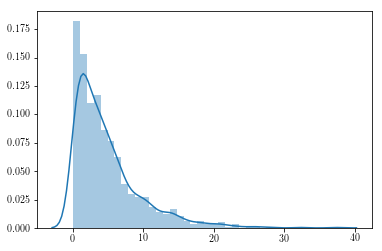

In [73]:
#Lets generate some exponentially increasing data
lambd = .2
d = np.random.exponential(scale = 1/lambd, size=1000)
sns.distplot(d)
plt.show()

In [82]:
code = '''
data {
    int<lower = 0> N;
    real d[N];
}
parameters {
    real beta;
}
model {
    beta ~ normal(-5., .1);
    d ~ exponential(beta);
}

'''
sm = pystan.StanModel(model_code = code, model_name='exp')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL exp_9f03013864502fb432f46291402fab11 NOW.


In [83]:
dat = {'N': len(d),
      'd': d}
fit = sm.sampling(data=dat, iter=1500, chains=1)

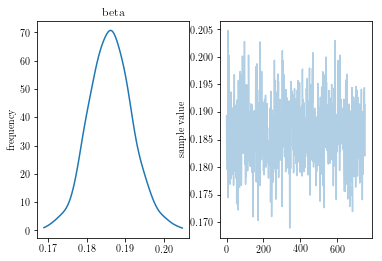

In [84]:
fit.plot()
plt.show()

4.849687961596758

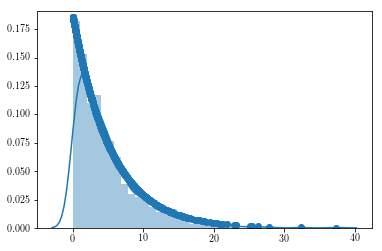

In [85]:
trace = fit.extract()
lambd = np.median(trace['beta'])
sns.distplot(d)
plt.scatter(d, lambd*np.exp(-d*lambd))
fbeta